In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [6]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
experiment_sub_dir = "2025May29-012929_configs"

exp_path = os.path.join(r"D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'su

In [7]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.9649,-9.323903,-8.391152,-8.830932,-8.825327,0.131821,-8.649833,-7.843408,...,3.935315,48749.0,192.0,0 days 00:06:00.366451,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
1,training,400000,0.9289,-9.504916,-8.572043,-8.943522,-8.935107,0.163850,-8.816131,-7.992411,...,3.965489,50000.0,200.0,0 days 00:06:20.629564,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
2,training,600000,0.8929,-9.885930,-8.347685,-8.778527,-8.733297,0.217326,-9.159032,-7.804157,...,1.831790,50000.0,200.0,0 days 00:06:38.610355,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
3,training,800000,0.8569,-9.149546,-8.102560,-8.447098,-8.424231,0.118248,-8.515202,-7.595205,...,2.181449,50000.0,200.0,0 days 00:06:40.811132,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
4,training,1000000,0.8209,-9.260078,-8.079938,-8.400558,-8.394744,0.113910,-8.572045,-7.574247,...,2.212247,50000.0,200.0,0 days 00:06:42.548716,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,validation,7200000,NaN,-9.246622,-9.246015,-9.246383,-9.246393,0.000133,-8.551601,-8.551073,...,2.512257,NaN,NaN,0 days 00:00:00.692810,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
636,validation,7400000,NaN,-9.084847,-9.084632,-9.084729,-9.084722,0.000059,-8.421275,-8.421091,...,2.503589,NaN,NaN,0 days 00:00:00.665032,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
637,validation,7600000,NaN,-9.272192,-9.271665,-9.271946,-9.271958,0.000138,-8.575289,-8.574835,...,2.493340,NaN,NaN,0 days 00:00:00.666710,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
638,validation,7800000,NaN,-9.115045,-9.114744,-9.114898,-9.114898,0.000066,-8.446769,-8.446508,...,2.505024,NaN,NaN,0 days 00:00:00.672010,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....


In [8]:
df[df['epoch_type'] == 'validation']

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_experiment_path,seed,experiment_name
40,validation,200000,NaN,-9.099152,-9.098858,-9.098970,-9.098968,0.000058,-8.452794,-8.452534,...,3.242303,NaN,NaN,0 days 00:00:00.638529,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
41,validation,400000,NaN,-8.917514,-8.917047,-8.917266,-8.917273,0.000097,-8.286195,-8.285773,...,0.346519,NaN,NaN,0 days 00:00:00.650206,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
42,validation,600000,NaN,-8.690708,-8.690305,-8.690480,-8.690464,0.000085,-8.103514,-8.103153,...,2.122870,NaN,NaN,0 days 00:00:00.656299,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
43,validation,800000,NaN,-8.435255,-8.434969,-8.435128,-8.435122,0.000065,-7.872484,-7.872224,...,2.198242,NaN,NaN,0 days 00:00:00.675093,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
44,validation,1000000,NaN,-8.221305,-8.220849,-8.221097,-8.221082,0.000104,-7.691052,-7.690646,...,2.191314,NaN,NaN,0 days 00:00:00.651156,1e-05,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.lr_1e-05__agent_params.args_....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,validation,7200000,NaN,-9.246622,-9.246015,-9.246383,-9.246393,0.000133,-8.551601,-8.551073,...,2.512257,NaN,NaN,0 days 00:00:00.692810,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
636,validation,7400000,NaN,-9.084847,-9.084632,-9.084729,-9.084722,0.000059,-8.421275,-8.421091,...,2.503589,NaN,NaN,0 days 00:00:00.665032,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
637,validation,7600000,NaN,-9.272192,-9.271665,-9.271946,-9.271958,0.000138,-8.575289,-8.574835,...,2.493340,NaN,NaN,0 days 00:00:00.666710,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....
638,validation,7800000,NaN,-9.115045,-9.114744,-9.114898,-9.114898,0.000066,-8.446769,-8.446508,...,2.505024,NaN,NaN,0 days 00:00:00.672010,1e-06,0.5,1000,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,3,0001_optim.args_.lr_1e-06__agent_params.args_....


In [9]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_optim.args_.lr                                 1e-05
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude      0.5
sub_exp_cfg_agent_params.args_.target_model_update_freq     1000
Name: 0, dtype: object
Best mean reward: -8.100987329633215


In [10]:
averaged_results

,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_model_update_freq,episode_rewards_mean,sub_experiment_path
0,1e-05,0.5,1000,-8.100987,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,1e-06,0.5,1000,-8.945156,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [11]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

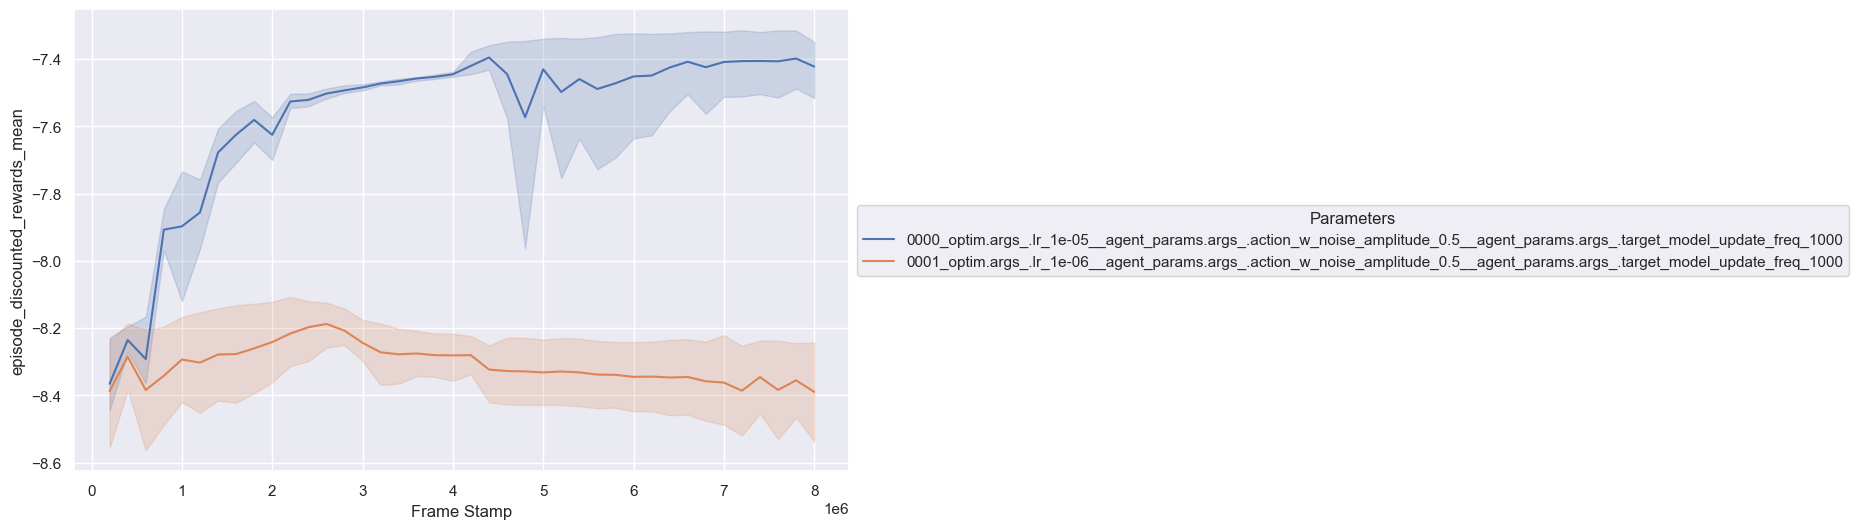

In [12]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df['epoch_type'] == 'validation']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, x='frame_stamp', y=selected_metric, hue=hue_col)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [13]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'su

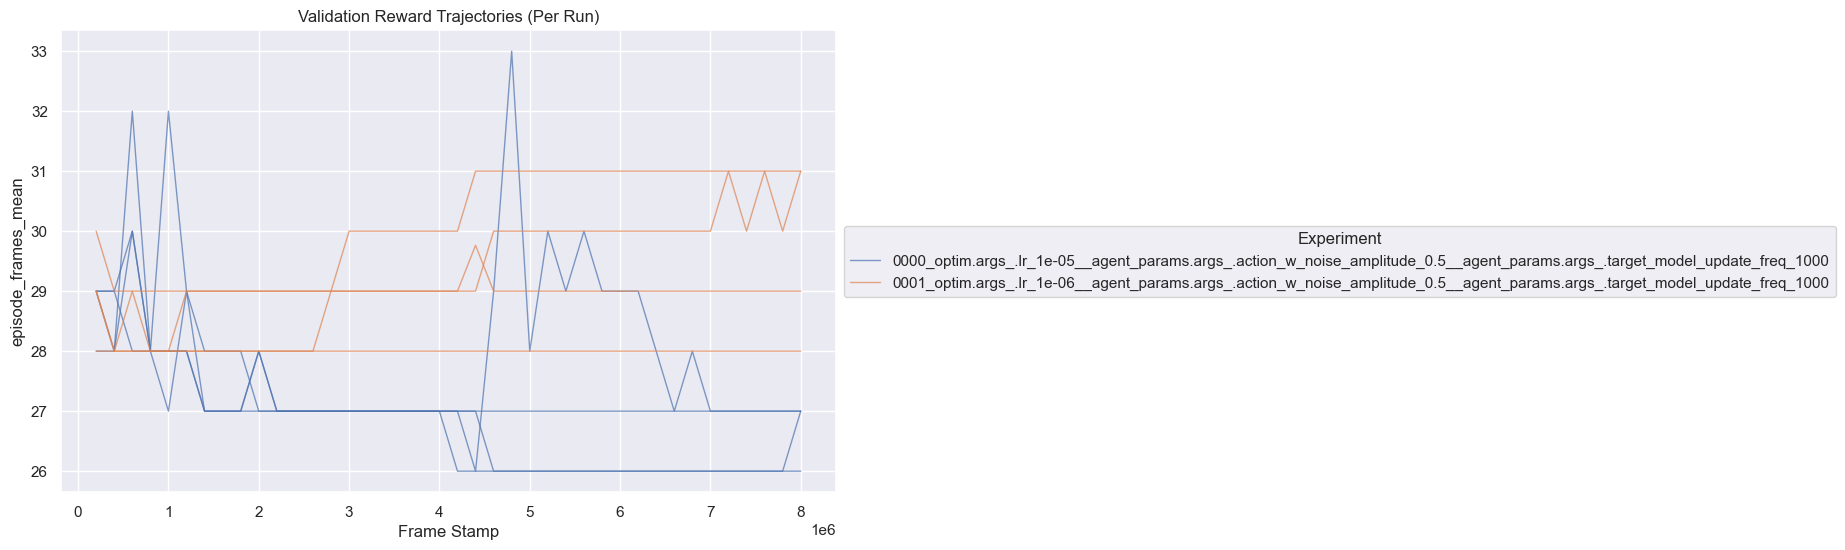

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [15]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.action_w_noise_amplitude,sub_exp_cfg_agent_params.args_.target_model_update_freq
79,validation,8000000,-7.879201,27.0,-7.384217,NaN,NaN,0 days 00:00:00.678516,0,0000_optim.args_.lr_1e-05__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-05,0.5,1000
159,validation,8000000,-7.803319,26.0,-7.323933,NaN,NaN,0 days 00:00:00.486809,1,0000_optim.args_.lr_1e-05__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-05,0.5,1000
239,validation,8000000,-7.924494,27.0,-7.421535,NaN,NaN,0 days 00:00:00.602164,2,0000_optim.args_.lr_1e-05__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-05,0.5,1000
319,validation,8000000,-8.075945,27.0,-7.559504,NaN,NaN,0 days 00:00:00.478102,3,0000_optim.args_.lr_1e-05__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-05,0.5,1000
399,validation,8000000,-8.813936,28.0,-8.206549,NaN,NaN,0 days 00:00:00.418096,0,0001_optim.args_.lr_1e-06__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-06,0.5,1000
479,validation,8000000,-9.173133,31.0,-8.485054,NaN,NaN,0 days 00:00:00.491165,1,0001_optim.args_.lr_1e-06__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-06,0.5,1000
559,validation,8000000,-8.912328,29.0,-8.278309,NaN,NaN,0 days 00:00:00.626361,2,0001_optim.args_.lr_1e-06__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-06,0.5,1000
639,validation,8000000,-9.288827,31.0,-8.589270,NaN,NaN,0 days 00:00:00.541124,3,0001_optim.args_.lr_1e-06__agent_params.args_....,D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,1e-06,0.5,1000


In [16]:
# agg_cols = [col for col in sub_df.columns if "sub_exp_cfg_agent_params" in col]
# aggregated_df = (
#     sub_df.groupby(agg_cols)
#     .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
#     .reset_index()
# )
# aggregated_df

In [17]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path', 'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq'],
      dtype='object')

In [18]:
# sub_df[[
#     "episode_discounted_rewards_mean", "episode_frames_mean",
#     "seed", "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"]
# ]

In [19]:
# sub_df[
#     (sub_df["sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"] == "0.3") 
# ]

In [20]:
# Print the experiment_name of the row with the highest episode_rewards_mean 
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['experiment_name'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['episode_rewards_mean'].values[0])


D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025May29-012929_configs\0000_optim.args_.lr_1e-05__agent_params.args_.action_w_noise_amplitude_0.5__agent_params.args_.target_model_update_freq_1000\1


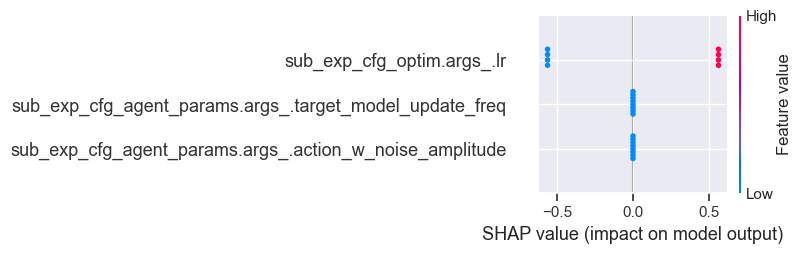

In [21]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [22]:
hyperparam_columns

['sub_exp_cfg_optim.args_.lr',
 'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude',
 'sub_exp_cfg_agent_params.args_.target_model_update_freq']

In [23]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()
